In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [69]:
x1 = np.random.randint(1, 11, 20)
x2 = np.random.randint(1, 11, 20)
x3 = np.random.randint(1, 11, 20)
x4 = np.random.randint(1, 11, 20)
x5 = np.random.randint(1, 11, 20)
x6 = np.random.randint(1, 11, 20)
x7 = np.random.randint(1, 11, 20)
x8 = np.random.randint(1, 11, 20)
x9 = np.random.randint(1, 11, 20)
x10 = np.random.randint(1, 11, 20)
x11 = np.random.randint(1, 11, 20)
x12 = np.random.randint(1, 11, 20)
x13 = np.random.randint(1, 11, 20)
x14 = np.random.randint(1, 11, 20) # нужно подобрать данные, чтобы можно было проводить факторный анализ 

In [70]:
data = {'x1': x1,'x2': x2,'x3': x3,'x4': x4,'x5': x5,'x6': x6,'x7': x7,'x8': x8,'x9': x9,'x10': x10,'x11': x11,'x12': x12,'x13': x13,'x14': x14,}
columns = ['x1', 'x2','x3','x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10','x11','x12', 'x13', 'x14']

In [71]:
df_factors = pd.DataFrame(data=data, columns=columns)
df_factors

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14
0,2,9,8,3,7,4,2,4,9,3,2,7,4,3
1,4,10,2,5,2,6,2,9,7,6,8,4,9,6
2,1,2,6,2,5,6,6,6,9,10,3,4,6,1
3,6,3,1,1,2,9,5,1,8,6,4,7,9,7
4,8,3,9,2,9,8,8,3,9,1,7,9,1,3
5,6,3,10,1,1,1,2,3,2,5,3,1,8,2
6,5,2,7,9,1,3,3,10,7,4,1,7,5,5
7,4,4,4,10,10,2,5,3,3,3,4,3,5,3
8,3,4,2,7,7,7,3,8,10,3,1,7,8,10
9,7,6,3,9,7,10,4,9,10,8,6,4,5,4


In [72]:
df_factors.to_excel('main_table.xlsx')

In [73]:
from factor_analyzer import FactorAnalyzer

In [74]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(df_factors)
chi_square_value, p_value # p_value должно стремиться к нулю

(96.39717220797175, 0.32938143674188475)

In [75]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df_factors)
kmo_model # kmo_model коэффициент должен быть больше 0.6

0.3268615241592613

In [76]:
fa = FactorAnalyzer()
fa.fit(df_factors)
ev, v = fa.get_eigenvalues()
df = pd.DataFrame(data=ev, index=range(len(ev)))
df.to_excel('eigenvalues.xlsx')

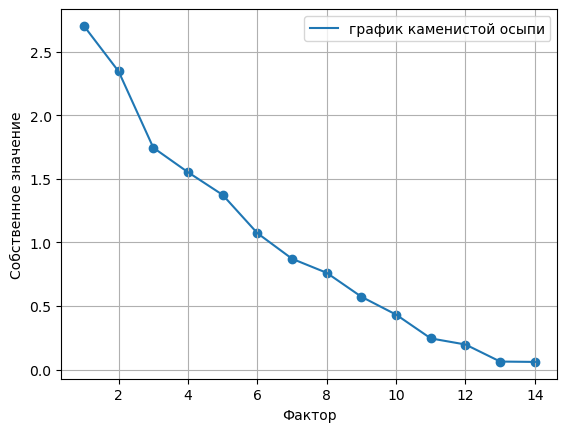

In [77]:
fig, ax = plt.subplots()
ax.scatter(range(1, df_factors.shape[1]+1), ev)
ax.plot(range(1, df_factors.shape[1]+1), ev, label='график каменистой осыпи')
ax.set_xlabel('Фактор')
ax.set_ylabel('Собственное значение')
ax.legend()
ax.grid()
plt.show()
fig.savefig('plot_of_rocky.pdf')

In [78]:
fa = FactorAnalyzer()
fa.set_params(n_factors=5, rotation='varimax')
fa.fit(df_factors)
loadings = fa.loadings_
loadings

array([[-0.0064501 ,  0.11038513,  0.5288923 ,  0.39484605,  0.07183715],
       [ 0.44315538,  0.15832816,  0.21767783,  0.08618752, -0.13136384],
       [-0.28013344, -0.71257502, -0.09959785, -0.03326502, -0.14022648],
       [-0.12917649,  0.27375388, -0.81447094,  0.23198129, -0.00858815],
       [ 0.05788444, -0.15836547, -0.11988425,  0.0852616 ,  0.78302032],
       [ 0.84937859,  0.15366021,  0.03564441, -0.09413345,  0.25450297],
       [-0.23771206, -0.10380773,  0.00484294,  0.75584744,  0.13386836],
       [-0.0724055 ,  0.45020156,  0.07621611,  0.14491889,  0.01117842],
       [ 0.14243938,  0.26116338, -0.01678345, -0.16506516,  0.52500608],
       [-0.05098966,  0.17853624,  0.36227306,  0.02799649, -0.15370373],
       [ 0.20599853,  0.10654113, -0.02930119,  0.75915587, -0.29268317],
       [ 0.71240563, -0.09448353, -0.20438508, -0.06977463,  0.09959125],
       [-0.48469862,  0.56711036,  0.59754199,  0.0103022 , -0.32628766],
       [ 0.07854238,  0.55298638, -0.0

In [79]:
df_loadings = pd.DataFrame(loadings, index = columns, columns = ['Фактор1', 'Фактор2', 'Фактор3', 'Фактор4', 'Фактор5'])
df_loadings.to_excel('loadings.xlsx')

In [80]:
df_loadings

,Фактор1,Фактор2,Фактор3,Фактор4,Фактор5
x1,-0.006450,0.110385,0.528892,0.394846,0.071837
x2,0.443155,0.158328,0.217678,0.086188,-0.131364
x3,-0.280133,-0.712575,-0.099598,-0.033265,-0.140226
x4,-0.129176,0.273754,-0.814471,0.231981,-0.008588
x5,0.057884,-0.158365,-0.119884,0.085262,0.783020
x6,0.849379,0.153660,0.035644,-0.094133,0.254503
x7,-0.237712,-0.103808,0.004843,0.755847,0.133868
x8,-0.072405,0.450202,0.076216,0.144919,0.011178
x9,0.142439,0.261163,-0.016783,-0.165065,0.525006
x10,-0.050990,0.178536,0.362273,0.027996,-0.153704


In [81]:
factor_variance = fa.get_factor_variance()

In [82]:
df_factor_variance = pd.DataFrame(data = factor_variance, index = ['SS Loadings', 'Proportion Var', 'Cumulative Var'], columns = ['Фактор1', 'Фактор2', 'Фактор3', 'Фактор4', 'Фактор5'])
df_factor_variance.to_excel('factor_variance.xlsx')

In [83]:
df_factor_variance

,Фактор1,Фактор2,Фактор3,Фактор4,Фактор5
SS Loadings,1.892082,1.629873,1.558378,1.469214,1.245326
Proportion Var,0.135149,0.116420,0.111313,0.104944,0.088952
Cumulative Var,0.135149,0.251568,0.362881,0.467825,0.556777
